# Exercícios

### Para todos os desafios, insira legendas, rótulos dos eixos, título do gráfico.

### Resolva os 3 primeiros exercícios usando matplotlib e os 3 seguintes usando altair. O último, fica à seu critério

## 1) Utilizando o dataset Pokemon, crie uma função que receba o dataset e o atributo e retorne um histograma que mostre a distribuição do valor dos atributos “attack”, “defense”,”Sp.Atk”, “Sp.Def” e “Speed”. Insira uma linha indicando o valor médio do atributo

In [46]:
# resposta 1
import matplotlib.pyplot as plt
import pandas as pd

def show_histogram(dataset, attribute):
    plt.hist(dataset[attribute], alpha=0.75)
    plt.axvline(dataset[attribute].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.title(f'Histogram of {attribute}')
    plt.show()
    
poke = pd.read_csv('pokemon.csv')
show_histogram(poke, 'Attack')
show_histogram(poke, 'Defense')
show_histogram(poke, 'Sp. Atk')
show_histogram(poke, 'Sp. Def')
show_histogram(poke, 'Speed')

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

## 2) Usando o dataset Pokemon, crie um scatter plot comparando ataque (eixo x) e defesa (eixo y) de pokemons dos tipos Fire e Water. 

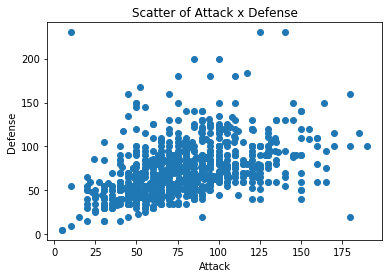

In [28]:
# resposta 2
plt.scatter(poke['Attack'], poke['Defense'])
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Scatter of Attack x Defense')
plt.show()

## 3) Usando o dataset Pokemons, crie um gráfico de linha para comparar a quantidade de pokemons de cada tipo ao longo das gerações

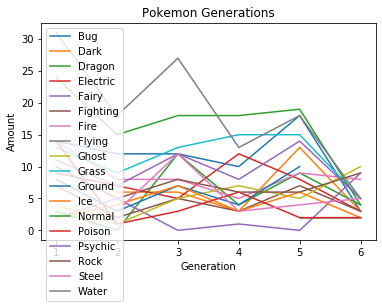

In [143]:
# resposta 3
import numpy as np

pokemons_by_type = poke.groupby(['Type 1'])

for pokemon_by_type in pokemons_by_type:
    generation_min = min(pokemon_by_type[1]['Generation'])
    generation_max = max(pokemon_by_type[1]['Generation'])
    array_generations = []
    array_amount_of_pokemons = []
    for pokemon_generation in range(generation_min, generation_max + 1):
        array_generations.append(pokemon_generation)
        array_amount_of_pokemons.append((pokemon_by_type[1][pokemon_by_type[1]['Generation'] == pokemon_generation]).count()[0])
    plt.plot(array_generations, array_amount_of_pokemons, label=pokemon_by_type[0])

plt.xlabel('Generation')
plt.ylabel('Amount')
plt.title("Pokemon Generations")
plt.legend()
plt.show()


## 4) Utilizando o dataset airports (var = data.airports()):
    -> Faça um rank bar dos 5 primeiros estados dos EUA com maior número de aeroportos


In [55]:
# resposta 4
import altair as alt
from vega_datasets import data
airports = data.airports()[data.airports()['country'] == 'USA'].groupby(['state']).size().reset_index(name='count').sort_values(by=['count'], ascending=False).head(5)
alt.Chart(airports).mark_bar().encode(y='state', x='count')

SyntaxError: invalid syntax (<ipython-input-55-44676c694c25>, line 4)

## 5) Utilizando o conjunto de dados íris (var = data.íris()):
    -> Crie dois gráficos scatter, chart1 e chart2. Para o chart1, x=petalLenght, y=petalWidth. Para o chart2, x = sepalLenght, y=sepalWidth.

    -> Componha esses gráficos numa única apresentação. Para isso, faça chart1 | chart2


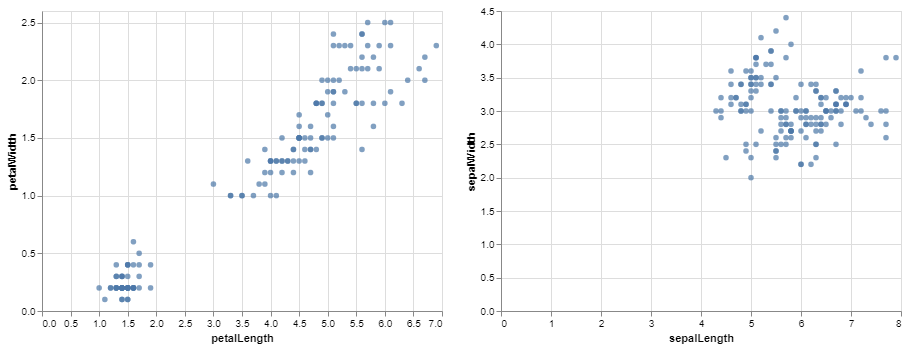

In [42]:
# resposta 5
chart_petal = alt.Chart(data.iris()).mark_circle().encode(x='petalLength', y='petalWidth')
chart_sepal = alt.Chart(data.iris()).mark_circle().encode(x='sepalLength', y='sepalWidth')
chart_petal | chart_sepal

## 6) Usando o dataset Pokemon, crie um rank bar que mostre o rank para Type 1

In [60]:
# resposta 6
pokemon_by_type1 = poke.groupby(['Type 1'])
#alt.Chart(source).mark_bar().encode(x='a', y='b')
pokemon_by_type1.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
737,669,Flabébé,Fairy,NaN,303,44,38,39,61,79,42,6,False
738,670,Floette,Fairy,NaN,371,54,45,47,75,98,52,6,False
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False


## 7) Utilizando o dataset Pokemon, crie um gráfico de barras que mostre, para cada geração, a proporção de pokemons Legendários e aqueles que não são legendários. Use stacked bar. 

In [69]:
# resposta 7
pokemons_by_generation = poke.groupby(['Generation'])
for pokemon_by_generation in pokemons_by_generation:
    #print(pokemon_by_generation[1])
    legendary = (pokemon_by_generation[1][pokemon_by_generation[1]['Legendary'] == True]).count()[0]
    print(legendary)
alt.Chart(poke).mark_bar().encode(x='Generation', y='sum()')
data.barley()

6
5
18
13
15
8


,yield,variety,year,site
0,27.00000,Manchuria,1931,University Farm
1,48.86667,Manchuria,1931,Waseca
2,27.43334,Manchuria,1931,Morris
3,39.93333,Manchuria,1931,Crookston
4,32.96667,Manchuria,1931,Grand Rapids
...,...,...,...,...
115,58.16667,Wisconsin No. 38,1932,Waseca
116,47.16667,Wisconsin No. 38,1932,Morris
117,35.90000,Wisconsin No. 38,1932,Crookston
118,20.66667,Wisconsin No. 38,1932,Grand Rapids
